# To build a model for training and testing:

In [ ]:
import os
import numpy as np # linear algebra
import matplotlib.pyplot as plt

In [ ]:
# Dl framwork - tensorflow, keras a backend 
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization 
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from IPython.display import display
from os import listdir
from os.path import isfile, join
from PIL import Image
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
cancerous_benign = 'dataset1/train/benign'
cancerous_maligant = 'dataset1/train/maligant'
non_cancerous_medium = 'dataset1/train/Medium'
non_cancerous_mild = 'dataset1/train/Mild'
non_cancerous_severe = 'dataset1/train/Severe'


In [5]:
def plot_images(item_dir, n=6):
    all_item_dir = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dir][:n]
    
    plt.figure(figsize=(35, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(2, n, idx+1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()

In [6]:
def Images_details_Print_data(data, path):  
    print(" ====== Images in: ", path)    
    for k, v in data.items():
        print("%s:\t%s" % (k, v))

def Images_details(path):
    files = [f for f in glob.glob(path + "**/*.*", recursive=True)]
    data = {}
    data['images_count'] = len(files)
    data['min_width'] = 10**100  # No image will be bigger than that
    data['max_width'] = 0
    data['min_height'] = 10**100  # No image will be bigger than that
    data['max_height'] = 0


    for f in files:
        im = Image.open(f)
        width, height = im.size
        data['min_width'] = min(width, data['min_width'])
        data['max_width'] = max(width, data['max_height'])
        data['min_height'] = min(height, data['min_height'])
        data['max_height'] = max(height, data['max_height'])

    Images_details_Print_data(data, path)


Train data for Cancerous Benign:

 ====== Images in:  dataset1/train/benign
images_count:	1377
min_width:	224
max_width:	224
min_height:	224
max_height:	224



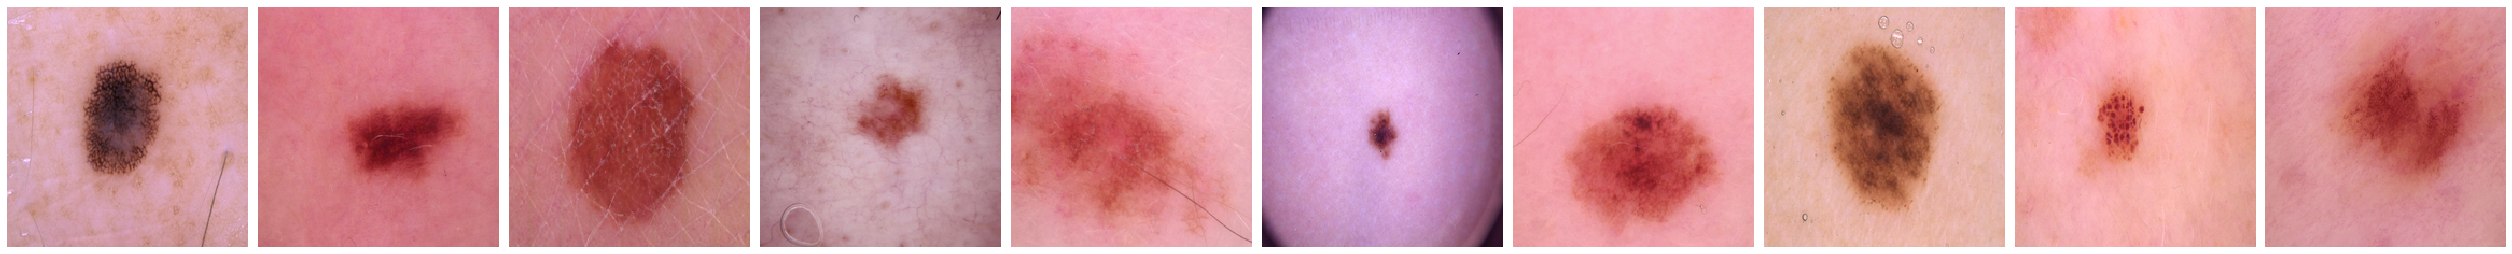

In [7]:
print("")
print("Train data for Cancerous Benign:")
print("")
Images_details(cancerous_benign)
print("")
plot_images(cancerous_benign, 10)


Train data for Cancerous maligant  :

 ====== Images in:  dataset1/train/maligant
images_count:	1145
min_width:	224
max_width:	224
min_height:	224
max_height:	224



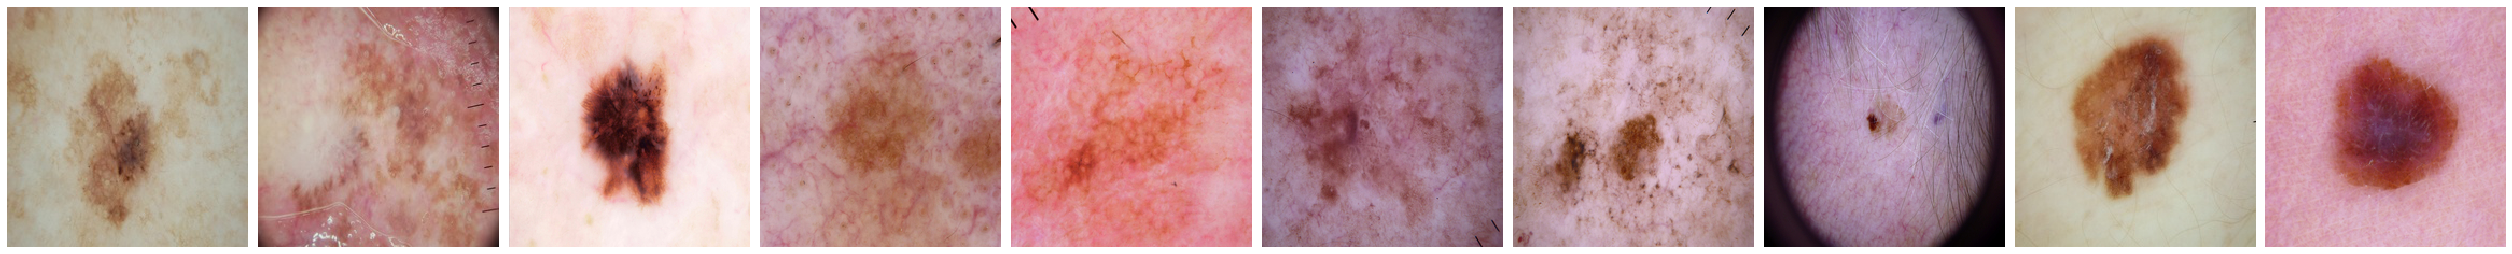

In [8]:
print("")
print("Train data for Cancerous maligant  :")
print("")
Images_details(cancerous_maligant )
print("")
plot_images(cancerous_maligant , 10)


Train data for Non Cancerous Medium:

 ====== Images in:  dataset1/train/Medium
images_count:	244
min_width:	464
max_width:	720
min_height:	457
max_height:	720



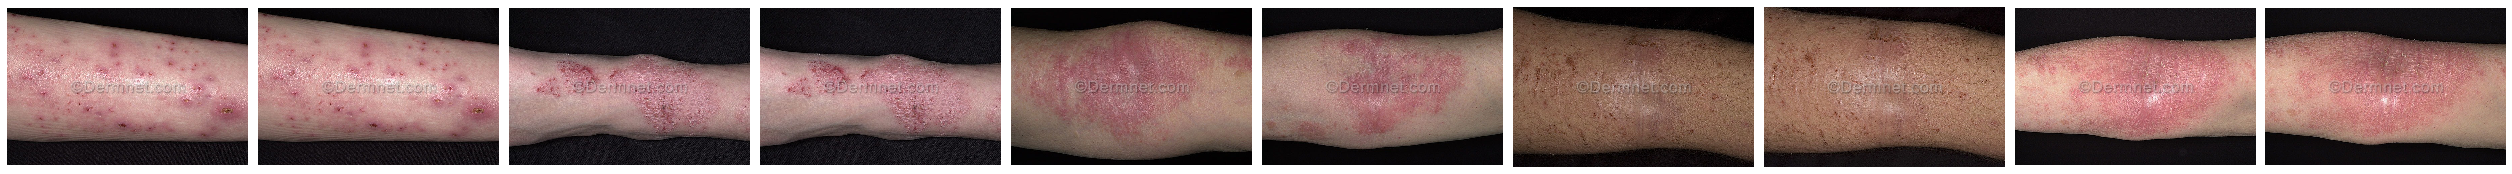

In [9]:
print("")
print("Train data for Non Cancerous Medium:")
print("")
Images_details(non_cancerous_medium)
print("")
plot_images(non_cancerous_medium, 10)


Train data for Non Cancerous Mild:

 ====== Images in:  dataset1/train/Mild
images_count:	233
min_width:	100
max_width:	1932
min_height:	100
max_height:	1932



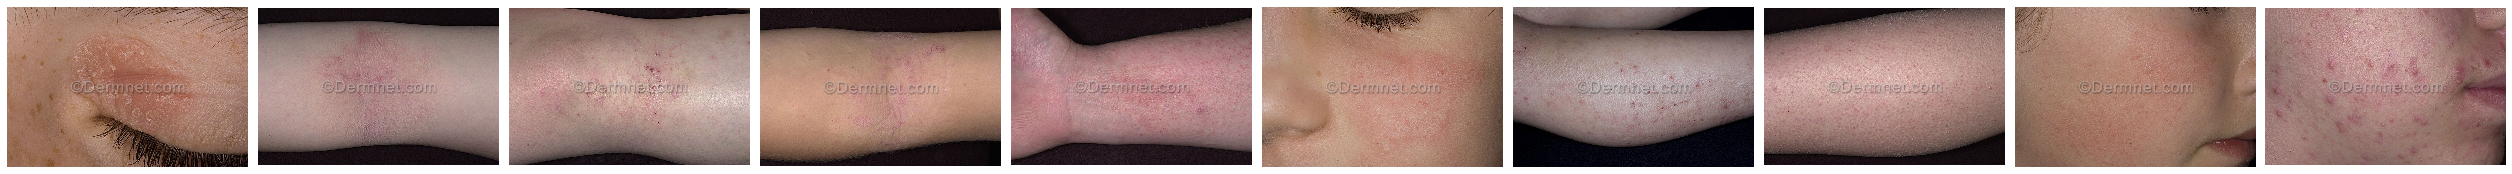

In [10]:
print("")
print("Train data for Non Cancerous Mild:")
print("")
Images_details(non_cancerous_mild)
print("")
plot_images(non_cancerous_mild, 10)


Train data for Non Cancerous severe:

 ====== Images in:  dataset1/train/Severe
images_count:	297
min_width:	335
max_width:	720
min_height:	419
max_height:	720



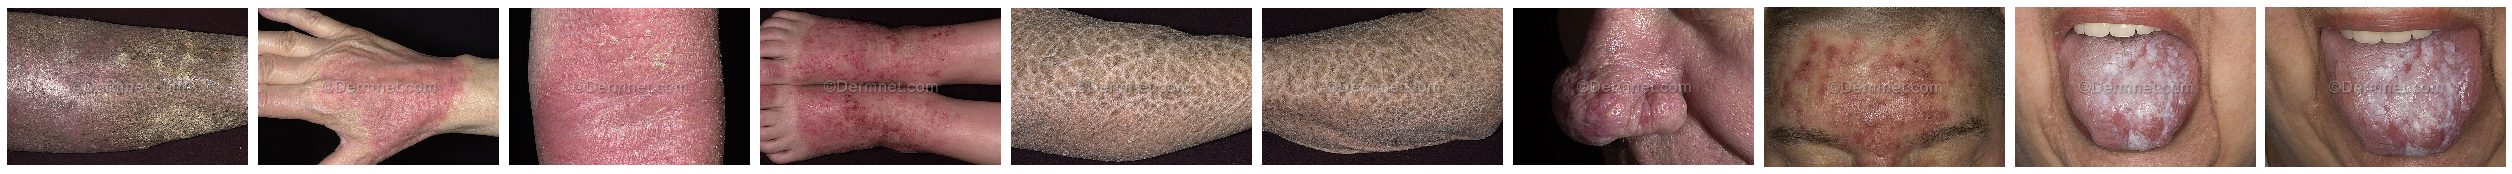

In [11]:
print("")
print("Train data for Non Cancerous severe:")
print("")
Images_details(non_cancerous_severe )
print("")
plot_images(non_cancerous_severe , 10)

In [12]:
Classifier=Sequential()
Classifier.add(Convolution2D(32,(3,3),input_shape=(224,224,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(50, activation='relu'))

In [13]:
Classifier.add(Dense(6, activation='softmax'))
Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [15]:
training_set=train_datagen.flow_from_directory('dataset1/train',target_size=(224,224),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('dataset1/test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 3370 images belonging to 6 classes.
Found 739 images belonging to 6 classes.


In [16]:
epochs = 20
batch_size = 32

In [ ]:
#### Fitting the model
history = Classifier.fit_generator(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 105 steps, validate for 23 steps
Epoch 1/20
105/105 [==============================] - 192s 2s/step - loss: 10.0817 - accuracy: 0.5291 - val_loss: 0.8873 - val_accuracy: 0.6807
Epoch 2/20
105/105 [==============================] - 148s 1s/step - loss: 0.9956 - accuracy: 0.6180 - val_loss: 1.4885 - val_accuracy: 0.4606
Epoch 3/20
105/105 [==============================] - 130s 1s/step - loss: 0.8121 - accuracy: 0.6588 - val_loss: 0.6958 - val_accuracy: 0.7391
Epoch 4/20
105/105 [==============================] - 132s 1s/step - loss: 0.7650 - accuracy: 0.6797 - val_loss: 0.6392 - val_accuracy: 0.7228
Epoch 5/20
105/105 [==============================] - 133s 1s/step - loss: 0.7426 - accuracy: 0.6950 - val_loss: 0.5443 - val_accuracy: 0.7649
Epoch 6/20
 77/105 [=====================>........] - ETA: 32s - loss: 0.6621 - accuracy: 0.7293

In [ ]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [ ]:
graph()